In [1]:
# Upload local script to Colab here.
from google.colab import files
uploaded = files.upload()

Saving airports.dat to airports.dat
Saving Camp_stats.csv to Camp_stats.csv
Saving routes.dat to routes.dat


In [2]:
import csv
f=open("Camp_stats.csv")
for row in csv.reader(f):
    print(row)

['Refugee_Camp_Name', 'Country', 'Population_2006', 'Population_2014']
['Kakuma', 'Kenya', '90457', '153959']
['Hagadera', 'Kenya', '59185', '106968']
['Adjumani', 'Uganda', '54051', '96926']
['Dagahaley', 'Kenya', '39526', '88486']
['Zaatari', 'Jordan', '0', '84773']


# Challenge 1

In [4]:
from google.colab import files
uploaded = files.upload()

Saving geo_distance.py to geo_distance.py


In [6]:
import csv
f = open("airports.dat")            # Opens airport.dat file
for row in csv.reader(f):        
    print(row[1])                   # Prints the name of every airport

Streaming output truncated to the last 5000 lines.
Guanare Airport
Higuerote Airport
Andrés Miguel Salazar Marcano Airport
Josefa Camejo International Airport
San Juan de Los Morros Airport
La Fria Airport
La Orchila Airport
La Chinita International Airport
Alberto Carnevalli Airport
Del Caribe Santiago Mariño International Airport
Simón Bolívar International Airport
Maturín Airport
Cacique Aramare Airport
General Bartolome Salom International Airport
Paramillo Airport
General Manuel Carlos Piar International Airport
Palmarito Airport
San Antonio Del Tachira Airport
Santa Bárbara de Barinas Airport
Santa Elena de Uairen Airport
Mayor Buenaventura Vivas International Airport
Sub Teniente Nestor Arias Airport
San Fernando De Apure Airport
San Tomé Airport
Santa Bárbara del Zulia Airport
Tucupita Airport
Tumeremo Airport
Arturo Michelena International Airport
Dr. Antonio Nicolás Briceño Airport
Valle de La Pascua Airport
Linden Airport
Lethem Airport
V.C. Bird International Airport
Sir Gr

# Challenge 2

In [7]:
latitudes = {}                                         # Empty dictionary to store latitudes
longitudes = {}                                        # Empty dictionary to store longitude  
f = open("airports.dat")
for row in csv.reader(f):
  airport_id = row[0]                                  # Mapping from airport ids to their geographic coordinates
  latitudes[airport_id] = float(row[6])
  longitudes[airport_id] = float(row[7])

# Challenge 3

In [9]:
import geo_distance 

In [10]:
# Code to import and check the geo_distance.py file to make sure it works.
geo_distance.distance(-37.814,144.963,52.519,13.406) # Melbourne to Berlin in km!       

15973.237754707652

In [11]:
# Copy of geo_distance.py
# Using the Haversine formula for geographic Great Circle Distance
# As per https://en.wikipedia.org/wiki/Haversine_formula

from math import cos,radians,sin,pow,asin,sqrt

def distance(lat1, long1, lat2, long2):
  radius = 6371 # radius of the earth in km, roughly https://en.wikipedia.org/wiki/Earth_radius
  # Lat,long are in degrees but we need radians
  lat1 = radians(lat1)
  lat2 = radians(lat2)
  long1 = radians(long1)
  long2 = radians(long2)

  dlat = lat2-lat1
  dlon = long2-long1

  a = pow(sin(dlat/2),2) + cos(lat1)*cos(lat2)*pow(sin(dlon/2),2)
  distance = 2 * radius * asin(sqrt(a))

  return distance

In [13]:
from google.colab import files
uploaded = files.upload()

Saving routes.dat to routes (1).dat


In [14]:
distances = []
f = open("routes.dat")
for row in csv.reader(f):
  source_airport = row[3]
  dest_airport = row[5]
  if source_airport in latitudes and dest_airport in latitudes:
    source_lat = latitudes[source_airport]
    source_long = longitudes[source_airport]
    dest_lat = latitudes[dest_airport]
    dest_long = longitudes[dest_airport]
    distances.append(distance(source_lat,source_long,dest_lat,dest_long))

In [15]:
distances

[1506.825604458928,
 1040.4383197669074,
 448.164908709546,
 770.5085001497805,
 1338.6314665862067,
 715.6493504840489,
 892.3827877543458,
 951.4321982829719,
 1171.8814952837668,
 1008.2531100895807,
 1685.4265243719858,
 1171.8814952837668,
 1506.825604458928,
 1040.4383197669074,
 770.5085001497805,
 715.6493504840489,
 1008.2531100895807,
 1216.8445674824818,
 723.523203520023,
 1216.8445674824818,
 1372.8864143629512,
 1464.056935072568,
 448.164908709546,
 892.3827877543458,
 1685.4265243719858,
 1372.8864143629512,
 554.703359662419,
 1012.6027135761158,
 1557.1718220176435,
 1324.6117527543267,
 1338.6314665862067,
 1370.297258632382,
 723.523203520023,
 554.703359662419,
 1012.6027135761158,
 1324.6117527543267,
 1370.297258632382,
 951.4321982829719,
 1464.056935072568,
 1557.1718220176435,
 488.33962159397527,
 1199.3591559200308,
 1338.6314665862067,
 608.6430610264199,
 488.33962159397527,
 608.6430610264199,
 882.1865409507233,
 1458.824309959064,
 517.4862726798776,
 1

# Challenge 4

Text(0, 0.5, 'Number of flights')

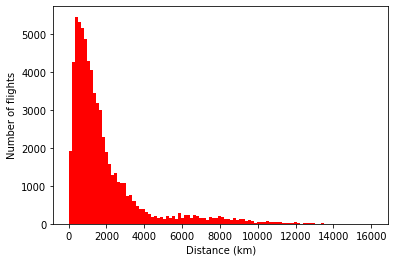

In [16]:
import numpy as np
import matplotlib.pyplot as plt
plt.hist(distances, 100, facecolor='r')           # Plotting histogram for distances and flights
plt.xlabel("Distance (km)")                       # Plotting distances on x axis 
plt.ylabel("Number of flights")                   # Plotting number of airports on y axis